In [81]:
from array import array
import P201_Functions as p201
import numpy as np
import math
import matplotlib.pyplot as plt

p201.set_dark_mode(True)


In [82]:
# Initial Conditions
length = 9.799 # length of pendulum in meters
method = 2 # 1 = Euler, 2 = Verlet
theta0 = -7.82*np.pi/180.0 # initial angle in radians
omega = 0

theta = theta0

# Other constants
gravity = 9.799 # gravitional acceleration in m/s^2
a = 0.0 # forward acceleration of van
g_over_L = gravity/length
a_over_L = a/length

tau = 0.0001 # timestep in seconds
nStep = int(1/tau*102.27)

Pi = math.pi

In [83]:
#accel = -g_over_L*math.sin(theta) #simple pendulum
accel = -g_over_L*math.sin(theta) - a_over_L*math.cos(theta) #pendulum in acc. van
theta_old = theta - omega*tau + 0.5*tau*tau*accel
print (accel, theta, theta_old)

0.1360614003964808 -0.13648474750595657 -0.13648474682564957


In [84]:
t_plot = array('d')
th_plot = array('d')
th_plot_corrected = array('d')
period = array('d')
trev = array('d')
period_corrected = array('d')
trev_corrected = array('d')


In [85]:

time = 0.0
irev = 0.0
dsum = 0.0
time_old = 0.0

for iStep in range(1,nStep+1):
    t_plot.append(time)
    th_plot.append(theta*180/Pi)
    dsum += theta*180/Pi
    time = time + tau
    #accel = -g_over_L*math.sin(theta) #simple pendulum
    accel = -g_over_L*math.sin(theta) - a_over_L*math.cos(theta) #pendulum in acc. van
    
    if (method == 1):
        theta_old = theta
        theta = theta + tau*omega
        omega = omega + tau*accel
    else:
        theta_new = 2*theta - theta_old + tau*tau*accel
        theta_old = theta
        theta = theta_new

    if (theta*theta_old < 0):
        print ("Zero Crossing at time t = %f" % time)
        if (irev == 0):
            time_old = time
        else:
            period.append(2*(time - time_old))
            trev.append(time)
            time_old = time
        irev = irev + 1

theta_avg = dsum/nStep
        
for iStep in range(1,nStep+1):
    th_plot_corrected.append(th_plot[iStep-1]-theta_avg)

time = 0.0
irev = 0.0
dsum = 0.0
time_old = 0.0

for iStep in range(1,nStep-1):
    time = time + tau
    if (th_plot_corrected[iStep+1]*th_plot_corrected[iStep] < 0):
        print ("Zero Crossing at time t = %f" % time)
        if (irev==0):
            time_old = time
        else:
            period_corrected.append(2*(time - time_old))
            trev_corrected.append(time)
            time_old = time
        irev = irev + 1

Zero Crossing at time t = 1.572700
Zero Crossing at time t = 4.717900
Zero Crossing at time t = 7.863200
Zero Crossing at time t = 11.008400
Zero Crossing at time t = 14.153700
Zero Crossing at time t = 17.298900
Zero Crossing at time t = 20.444200
Zero Crossing at time t = 23.589500
Zero Crossing at time t = 26.734700
Zero Crossing at time t = 29.880000
Zero Crossing at time t = 33.025200
Zero Crossing at time t = 36.170500
Zero Crossing at time t = 39.315700
Zero Crossing at time t = 42.461000
Zero Crossing at time t = 45.606200
Zero Crossing at time t = 48.751500
Zero Crossing at time t = 51.896700
Zero Crossing at time t = 55.042000
Zero Crossing at time t = 58.187300
Zero Crossing at time t = 61.332500
Zero Crossing at time t = 64.477800
Zero Crossing at time t = 67.623000
Zero Crossing at time t = 70.768300
Zero Crossing at time t = 73.913500
Zero Crossing at time t = 77.058800
Zero Crossing at time t = 80.204000
Zero Crossing at time t = 83.349300
Zero Crossing at time t = 86.49

In [86]:
theta_avg_theory = np.arctan(-a/gravity)*180.0/np.pi
nPeriod = int(irev - 1)
print ("Equilibrium Angle = %11.7f" % theta_avg)
print ("Equilibrium Angle Theory = %11.7f" % theta_avg_theory)
print ("Number of periods = ",nPeriod)

Equilibrium Angle =  -0.0764747
Equilibrium Angle Theory =  -0.0000000
Number of periods =  32


Text(0.5, 1.0, 'Pendulum Period vs. Time')

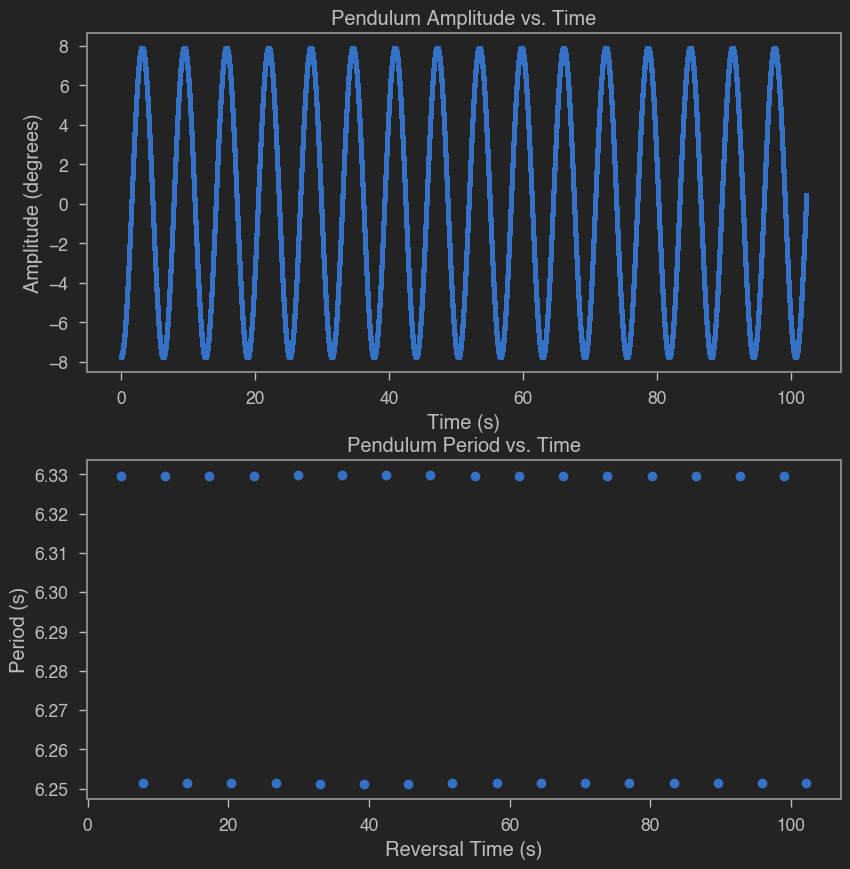

In [87]:
fig1, ax1 = plt.subplots(2, 1, figsize=(9,9))
fig1.tight_layout(pad=2.5)
ax1[0].plot(t_plot,th_plot_corrected,'.')
ax1[0].set_xlabel("Time (s)")
ax1[0].set_ylabel("Amplitude (degrees)")
ax1[0].set_title("Pendulum Amplitude vs. Time")
ax1[1].plot(trev_corrected,period_corrected,'o')
ax1[1].set_xlabel("Reversal Time (s)")
ax1[1].set_ylabel("Period (s)")
ax1[1].set_title("Pendulum Period vs. Time")

In [88]:
AvePeriod = 0.0
ErrorBar = 0.0
for i in range(1,nPeriod+1):
    AvePeriod = AvePeriod + period_corrected[i-1]
AvePeriod = AvePeriod/nPeriod
for i in range(1,nPeriod+1):
    ErrorBar = ErrorBar + (period_corrected[i-1]-AvePeriod)*(period_corrected[i-1]-AvePeriod)
ErrorBar = math.sqrt(ErrorBar/(nPeriod*(nPeriod-1)))
print("Average Period = %f +/- %f" % (AvePeriod,ErrorBar))
    

Average Period = 6.290506 +/- 0.007030


In [89]:
t0=theta0
#t_small_angle = 2.0*Pi/math.sqrt(g_over_L)
t_small_angle = 2.0*Pi/math.sqrt(math.sqrt(gravity**2+a**2)/length)
#t_infinite = 2.0*Pi/math.sqrt(g_over_L)*(1.0+t0*t0/16.0+math.pow(t0,4)*11.0/3072.0+math.pow(t0,6)*173.0/737280.0)
t_infinite = t_small_angle*(1.0+t0*t0/16.0+math.pow(t0,4)*11.0/3072.0+math.pow(t0,6)*173.0/737280.0)
#error_infinite = 2.0*Pi/math.sqrt(g_over_L)*math.pow(t0,8)*22931.0/1321205760.0
error_infinite = t_small_angle*math.pow(t0,8)*22931.0/1321205760.0

In [90]:
print("Small Angle prediction = %f" % (t_small_angle))
print("Infinite series prediction = %f +/- %f" % (t_infinite,error_infinite))

Small Angle prediction = 6.283185
Infinite series prediction = 6.290508 +/- 0.000000


Text(0.5, 1.0, '1=Sim,2=Theory,3=SmallAngle')

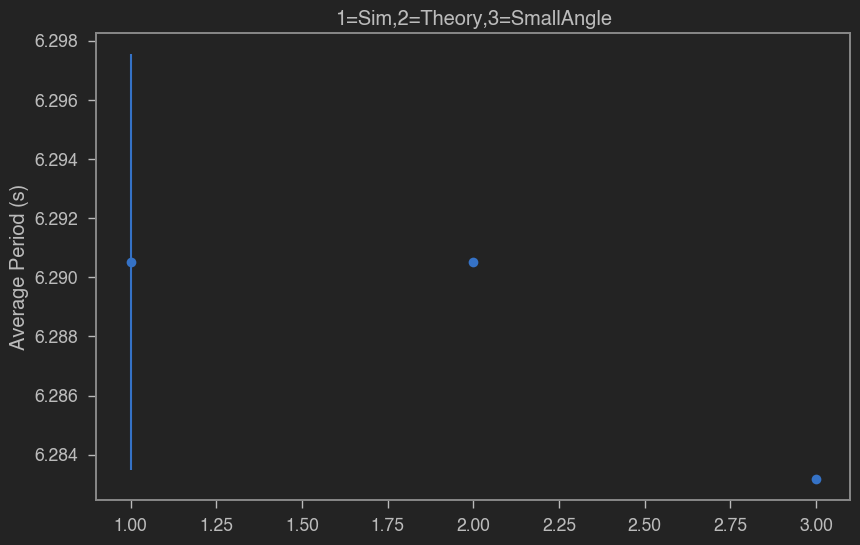

In [91]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')
npoints = 3
x.append(1)
x.append(2)
x.append(3)
ex.append(0)
ex.append(0)
ex.append(0)
y.append(AvePeriod)
y.append(t_infinite)
y.append(t_small_angle)
ey.append(ErrorBar)
ey.append(error_infinite)
ey.append(0)

fig2, ax2 = plt.subplots(1, 1, figsize=(9,6))
fig2.tight_layout(pad=2.5)
ax2.errorbar(x,y,yerr=ey,fmt='o',capsize=5.0)
ax2.set_ylabel("Average Period (s)")
ax2.set_title("1=Sim,2=Theory,3=SmallAngle")
